# Business Case: LoanTap Logistic Regression
LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

- Personal Loan
- EMI Free Loan
- Personal Overdraft
- Advance Salary Loan

## Problem Statement
Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

## Features
- loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- term : The number of payments on the loan. Values are in months and can be either 36 or 60.
- int_rate : Interest Rate on the loan
- installment : The monthly payment owed by the borrower if the loan originates.
- grade : LoanTap assigned loan grade
- sub_grade : LoanTap assigned loan subgrade
- emp_title :The job title supplied by the Borrower when applying for the loan.*
- emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
- annual_inc : The self-reported annual income provided by the borrower during registration.
- verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
- issue_d : The month which the loan was funded
- loan_status : Current status of the loan - Target Variable
- purpose : A category provided by the borrower for the loan request.
- title : The loan title provided by the borrower
- dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
- earliest_cr_line :The month the borrower's earliest reported credit line was opened
- open_acc : The number of open credit lines in the borrower's credit file.
- pub_rec : Number of derogatory public records
- revol_bal : Total credit revolving balance
- revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- total_acc : The total number of credit lines currently in the borrower's credit file
- initial_list_status : The initial listing status of the loan. Possible values are – W, F
- application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
- mort_acc : Number of mortgage accounts.
- pub_rec_bankruptcies : Number of public record bankruptcies
- Address: Address of the individual

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
from numpy import NaN, nan, NAN
from scipy import stats
import statsmodels.api as sm
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
# For pipeline creation
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
# plt.style.use('dark_background')

In [108]:
data = pd.read_csv("logistic_regression.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [109]:
data.shape

(396030, 27)

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [111]:
data.describe(include=[np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [112]:
data.describe(include = [object]).transpose()

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


## Is there any duplicate rows?

In [113]:
if data.shape[0] == data.drop_duplicates().shape[0] :
    print('No duplicates Found')
else:
    duplicates = data.shape[0] - data.drop_duplicates().shape[0]
    print('{} duplicates found'.format(duplicates))

No duplicates Found


## Handling missing values

In [114]:
# Missing values:

def missingValue(df):
    #Identifying Missing data.
    total_null = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/len(df))*100).sort_values(ascending = False)
    print(f"Total records in our data =  {df.shape[0]} where missing values are as follows:")

    missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
    return missing_data

In [115]:
missing_df = missingValue(data)
missing_df[missing_df['Total Missing'] > 0]

Total records in our data =  396030 where missing values are as follows:


,Total Missing,In Percent
mort_acc,37795,9.54
emp_title,22927,5.79
emp_length,18301,4.62
title,1755,0.44
pub_rec_bankruptcies,535,0.14
revol_util,276,0.07


emp_title, emp_legth, title, revol__util, mort_acc and pub_rec_bankruptcies has null values. As the amount of null values are very less, we will droping the rows with null values.

In [116]:
# droping rows with null values
data.dropna(inplace=True)

In [117]:
# list of categorical columns
cat_cols = data.select_dtypes('object').columns
# list of numerical columns
num_cols = data.columns[data.dtypes != 'object']

## Univariate Analysis

In [118]:
def numerical_feat(df,colname,nrows=2,mcols=2,width=15,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor("peachpuff")
    rows = 0
    for var in colname:        
        ax[rows][0].set_title("Boxplot for Outlier Detection ", fontweight="bold")
        plt.ylabel(var, fontsize=12)
        sns.boxplot(y = df[var],color='crimson',ax=ax[rows][0])
        
        # plt.subplot(nrows,mcols,pltcounter+1)
        sns.distplot(df[var],color='purple',ax=ax[rows][1])
        ax[rows][1].axvline(df[var].mean(), color='r', linestyle='--', label="Mean")
        ax[rows][1].axvline(df[var].median(), color='m', linestyle='-', label="Median")
        ax[rows][1].axvline(df[var].mode()[0], color='royalblue', linestyle='-', label="Mode")
        ax[rows][1].set_title("Outlier Detection ", fontweight="bold")
        ax[rows][1].legend({'Mean':df[var].mean(),'Median':df[var].median(),'Mode':df[var].mode()})
        rows += 1
    plt.show()

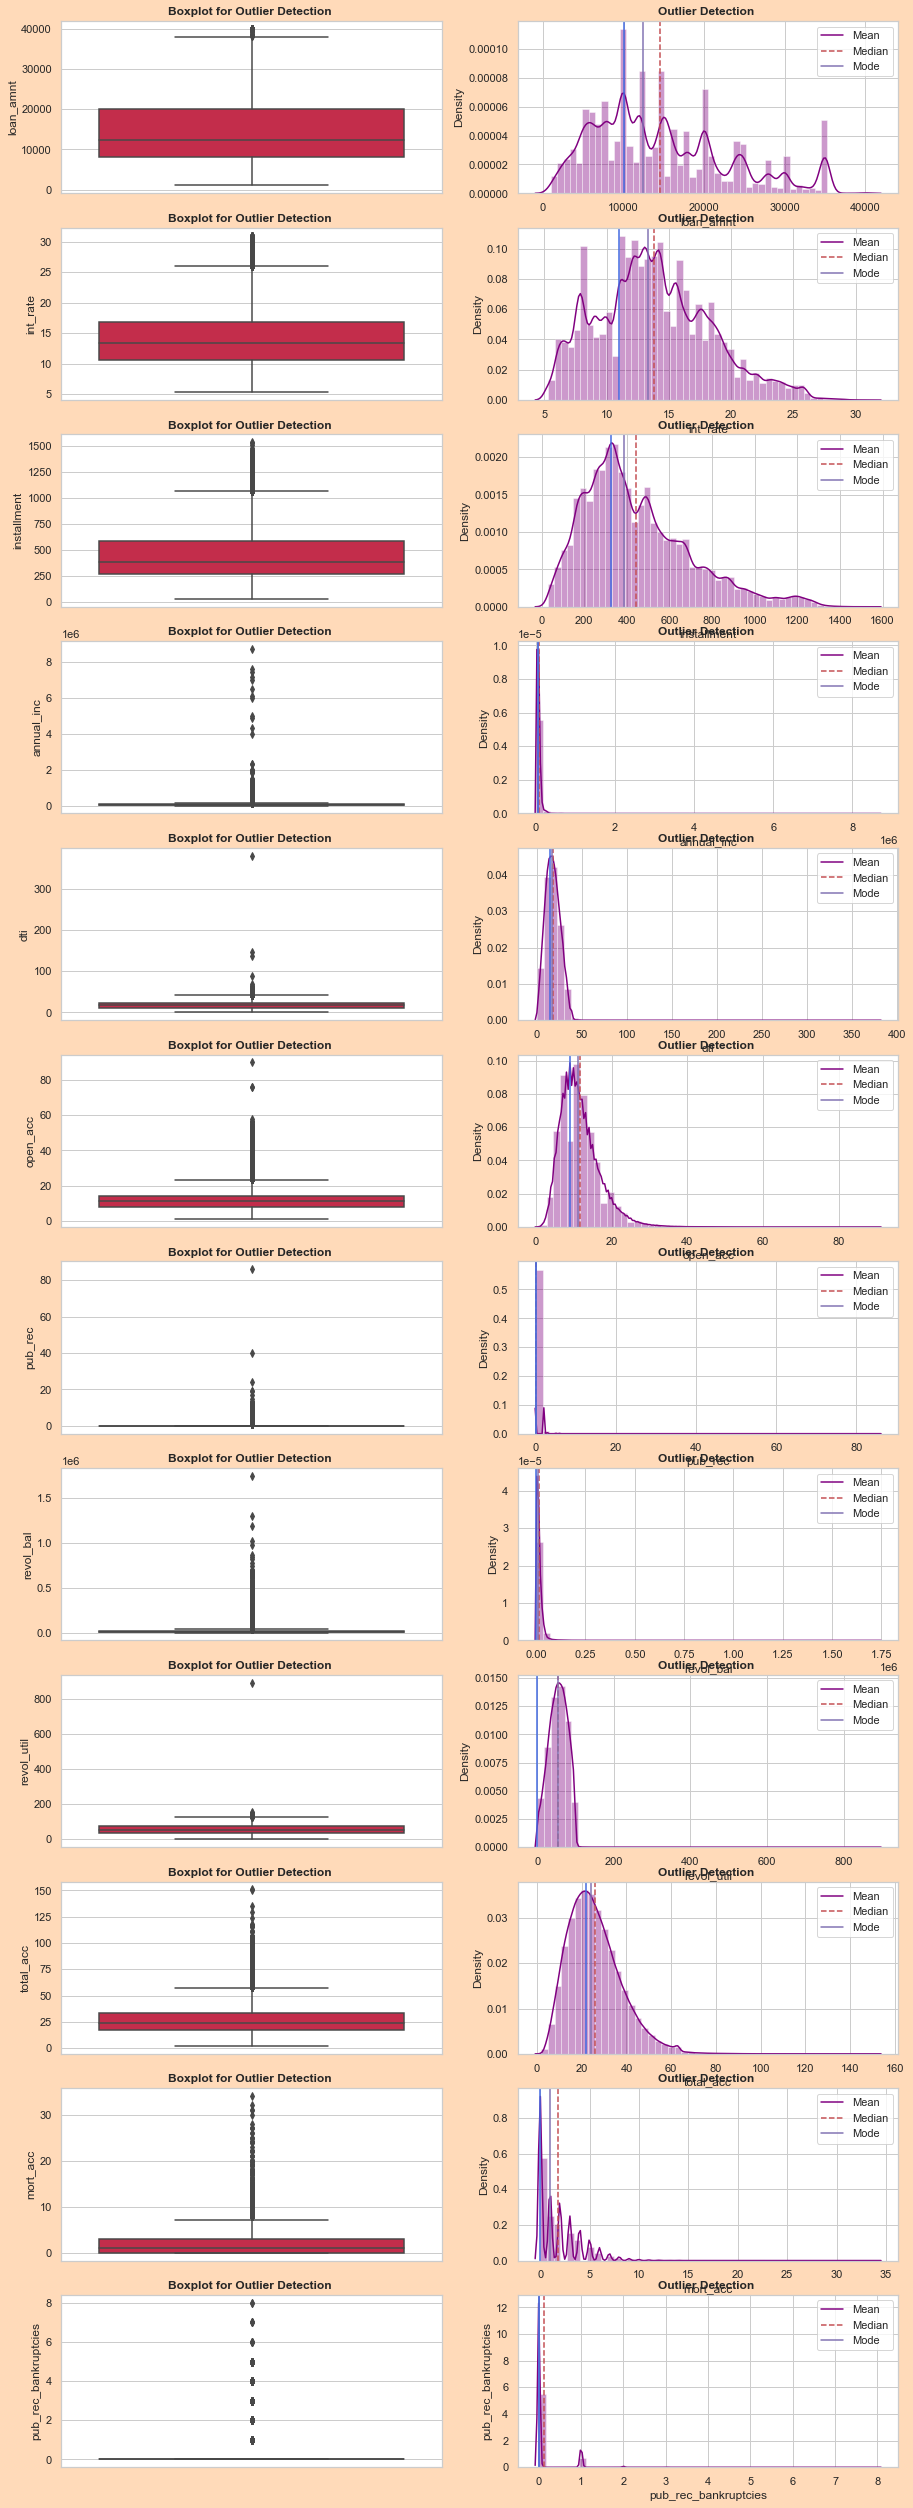

In [119]:
numerical_feat(data, num_cols, len(num_cols),2,15,45)

- Above plots can be interpreted as we have many outliers and we will explore more under outlier detection section.
- Out of 12 numerical features only 4 to 5 features follows some distribution(though it might have some outliers).
- Features like Pub_rec, Mort_acc, Pub_rec_bankruptcies has very less no. of unique values, also it suggested to create a binary feature out of it.

In [120]:
# Frequency of each feature in percentage.
def categorical_feat(df, colnames, nrows=2,mcols=2,width=15,height=80, sortbyindex=False):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))  
    fig.set_facecolor(color = 'peachpuff')
    string = "Frequency of "
    rows = 0                          
    for colname in colnames:
        count = (df[colname].value_counts(normalize=True)*100)
        string += colname + ' in (%)'
        if sortbyindex:
                count = count.sort_index()
        count.plot.bar(color=sns.color_palette("flare"),ax=ax[rows][0])
        ax[rows][0].set_ylabel(string, fontsize=14)
        ax[rows][0].set_xlabel(colname, fontsize=14)
        
        count.plot.pie(colors = sns.color_palette("flare"),autopct='%0.0f%%',
                       textprops={'fontsize': 14},shadow = True, ax=ax[rows][1])#explode=[0.2 if colname[i] == min(colname) else 0])        
        ax[rows][0].set_title("Frequency wise " + colname, fontweight="bold")
        string = "Frequency of "
        rows += 1 

In [121]:
for i in cat_cols:
    print(f" Unique values in {i} are {data[i].nunique()}")

 Unique values in term are 2
 Unique values in grade are 7
 Unique values in sub_grade are 35
 Unique values in emp_title are 150833
 Unique values in emp_length are 11
 Unique values in home_ownership are 6
 Unique values in verification_status are 3
 Unique values in issue_d are 58
 Unique values in loan_status are 2
 Unique values in purpose are 14
 Unique values in title are 32187
 Unique values in earliest_cr_line are 661
 Unique values in initial_list_status are 2
 Unique values in application_type are 3
 Unique values in address are 334143


In [122]:
# categorical columns with less unique features
cat_cols_2 = ['term', 'grade', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status','initial_list_status',
       'application_type']

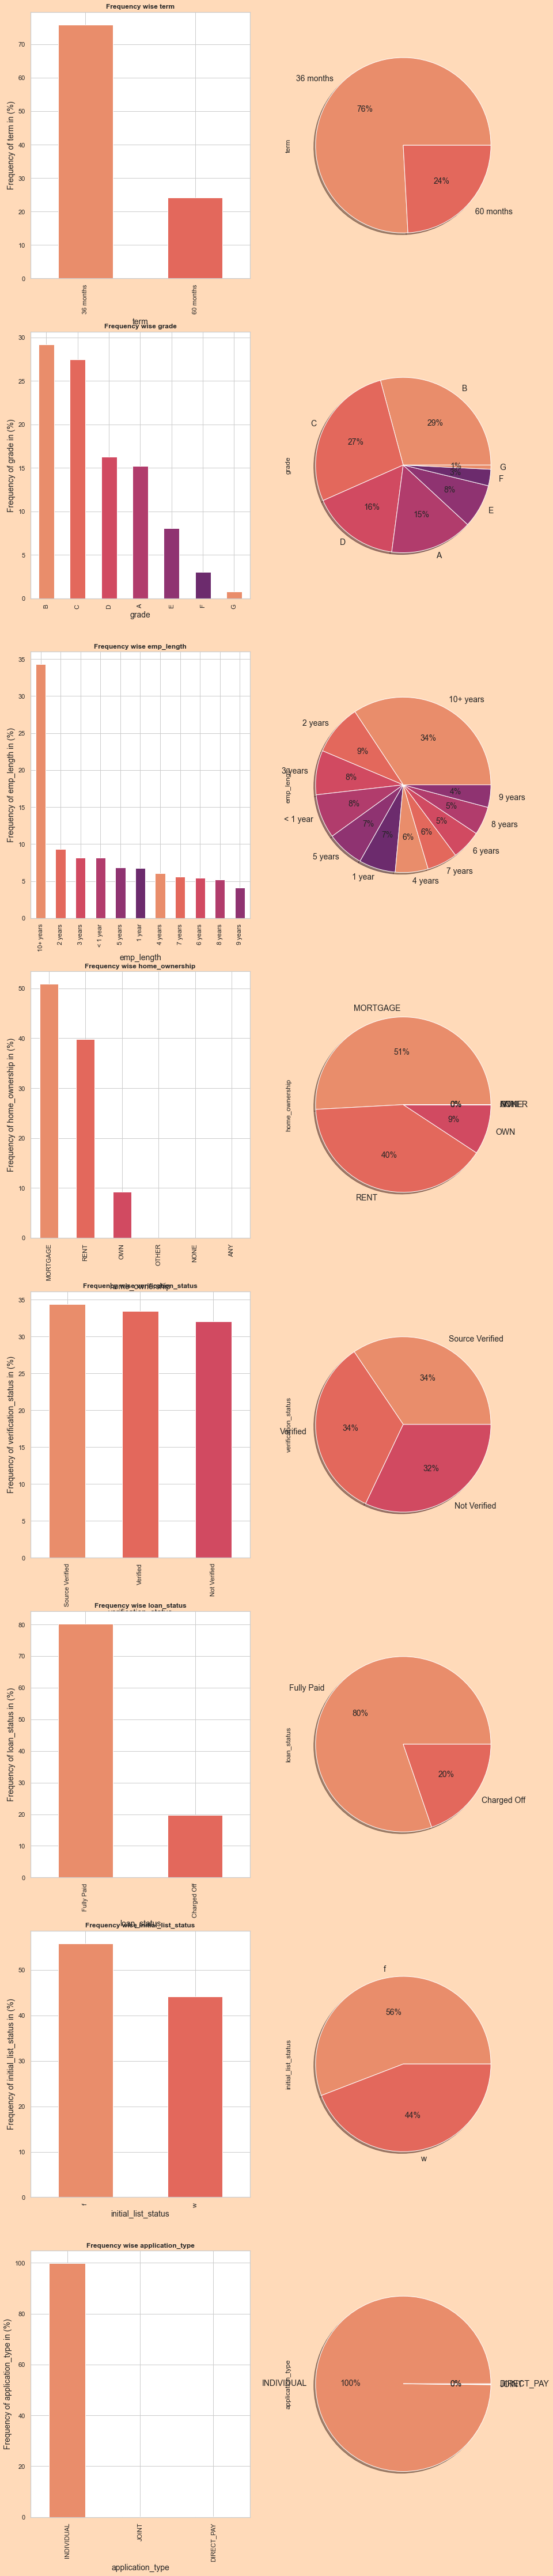

In [123]:
categorical_feat(data,cat_cols_2,len(cat_cols_2),2)

- For **term** column almost 76% data is for 36 months, and only 24% is for 60 months.
- **grade** column is having B and C is most of the data, 29% and 27% respectively. For F and G no.s are very less.
- For **emp_length** 10+ years is having most of the data, almost 34%.
- For **home_ownership** column almost 51% data is for MORTGAGE, and 40% is for RENT.
- **grade** column is having almost equal no. of values throughout the categories.
- For **Loan_status**, which is our target column almost 80% data for Fully Paid and 20% for Charged Off. Means we would need to balance the data further.
- **initial_list_status** column is ahving 56% data for f and 44% for w.
- **application_type** columns is having almost 100% data for INDIVIDUAL. It doesn't make sense to use this column. We will drop this column.

In [124]:
loan_data = data.drop('application_type', axis = 1)

In [125]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

## Bivariate Analysis

In [126]:
# loan_data.groupby(by='emp_title')
top_10 = loan_data['emp_title'].value_counts().head(10)
top_10

Teacher             4367
Manager             4231
Registered Nurse    1841
RN                  1840
Supervisor          1812
Sales               1618
Project Manager     1494
Owner               1381
Driver              1317
Office Manager      1213
Name: emp_title, dtype: int64

In [127]:
top_10_df = pd.DataFrame({'frequency':top_10})
top10_dfnewest = top_10_df.reset_index()
top10_dflatest = top10_dfnewest.rename(columns = {'index':'emp_title'})
top10_dflatest

,emp_title,frequency
0,Teacher,4367
1,Manager,4231
2,Registered Nurse,1841
3,RN,1840
4,Supervisor,1812
5,Sales,1618
6,Project Manager,1494
7,Owner,1381
8,Driver,1317
9,Office Manager,1213


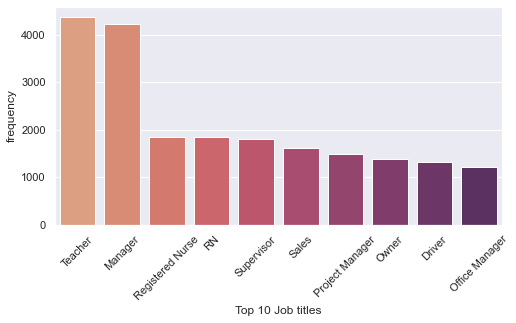

In [128]:
plt.figure(figsize=(8,4))
sns.set_theme(style="darkgrid")
sns.barplot(data=top10_dflatest, x='emp_title', y='frequency', palette = 'flare')
plt.xticks(rotation = 45)
plt.xlabel('Top 10 Job titles')
plt.show()

In [129]:
top_10_FP = loan_data[loan_data['loan_status']=='Fully Paid']['emp_title'].value_counts().head(10)
top_10_df_FP = pd.DataFrame({'frequency':top_10_FP})
top_10_df_FPnewest = top_10_df_FP.reset_index()
top10_dfFPlatest = top_10_df_FPnewest.rename(columns = {'index':'emp_title'})
top10_dfFPlatest

,emp_title,frequency
0,Teacher,3513
1,Manager,3304
2,Registered Nurse,1464
3,RN,1463
4,Supervisor,1413
5,Project Manager,1249
6,Sales,1223
7,Office Manager,965
8,Driver,945
9,Owner,931


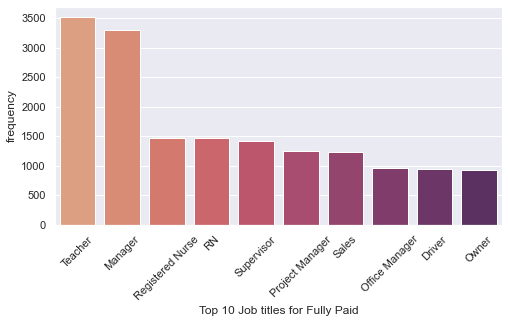

In [130]:
plt.figure(figsize=(8,4))
sns.set_theme(style="darkgrid")
sns.barplot(data=top10_dfFPlatest, x='emp_title', y='frequency', palette = 'flare')
plt.xticks(rotation = 45)
plt.xlabel('Top 10 Job titles for Fully Paid')
plt.show()

In [131]:
top_10_CO = loan_data[loan_data['loan_status']=='Charged Off']['emp_title'].value_counts().head(10)
top_10_df_CO = pd.DataFrame({'frequency':top_10_CO})
top_10_df_newest = top_10_df_CO.reset_index()
top10_dfCOlatest = top_10_df_newest.rename(columns = {'index':'emp_title'})
top10_dfCOlatest

,emp_title,frequency
0,Manager,927
1,Teacher,854
2,Owner,450
3,Supervisor,399
4,Sales,395
5,Registered Nurse,377
6,RN,377
7,Driver,372
8,manager,326
9,driver,283


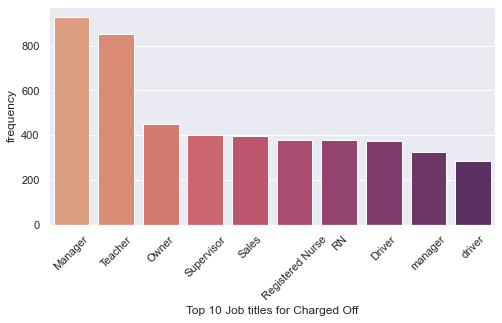

In [132]:
plt.figure(figsize=(8,4))
sns.set_theme(style="darkgrid")
sns.barplot(data=top10_dfCOlatest, x='emp_title', y='frequency', palette = 'flare')
plt.xticks(rotation = 45)
plt.xlabel('Top 10 Job titles for Charged Off')
plt.show()

- Name the top 2 afforded job titles - Teacher and Manager
- There is not much variance for loan status Fully Paid and Charged Off.

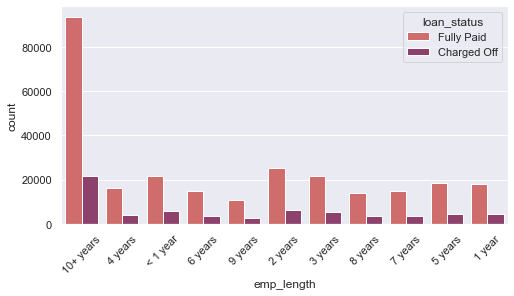

In [133]:
plt.figure(figsize = (8,4))
sns.countplot(x='emp_length',data=loan_data, hue = 'loan_status', palette='flare')
plt.xticks(rotation = 45)
plt.show()

- Customers's majoritly working for 10+ years.
- Charge off rates are extremely similar across all employment lengths.

In [2]:
plt.figure(figsize=(15,6))
for i,j in enumerate(num_cols[:3]):
    
    plt.subplot(1,3,i+1)
    plt.subplots_adjust(hspace = 0.8)
    sns.boxplot(y=j, x='loan_status', data=data, color='crimson')
#     plt.title("Feature "+j)
    plt.xticks(rotation=40)
    plt.tight_layout(pad=1)

NameError: name 'plt' is not defined

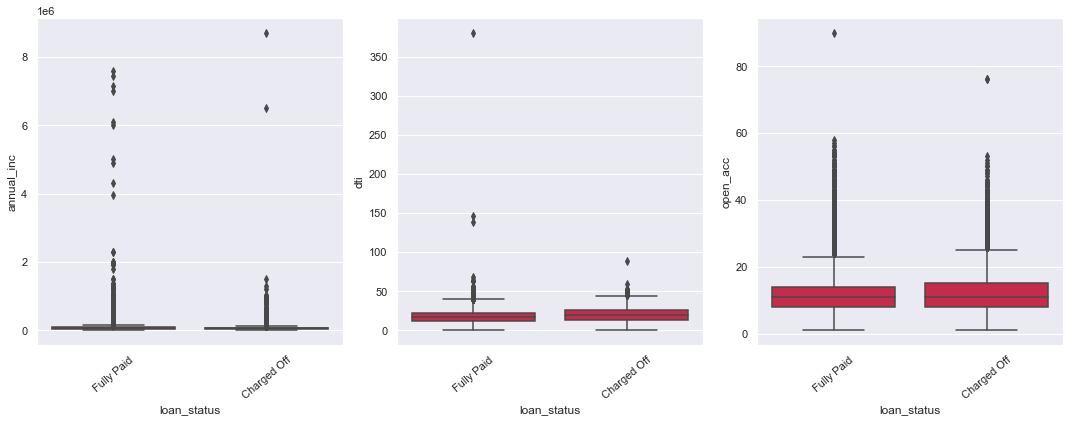

In [135]:
plt.figure(figsize=(15,6))
for i,j in enumerate(num_cols[3:6]):
    
    plt.subplot(1,3,i+1)
    plt.subplots_adjust(hspace = 0.8)
    sns.boxplot(y=j, x='loan_status', data=data, color='crimson')
    plt.xticks(rotation=40)
    plt.tight_layout(pad=1)

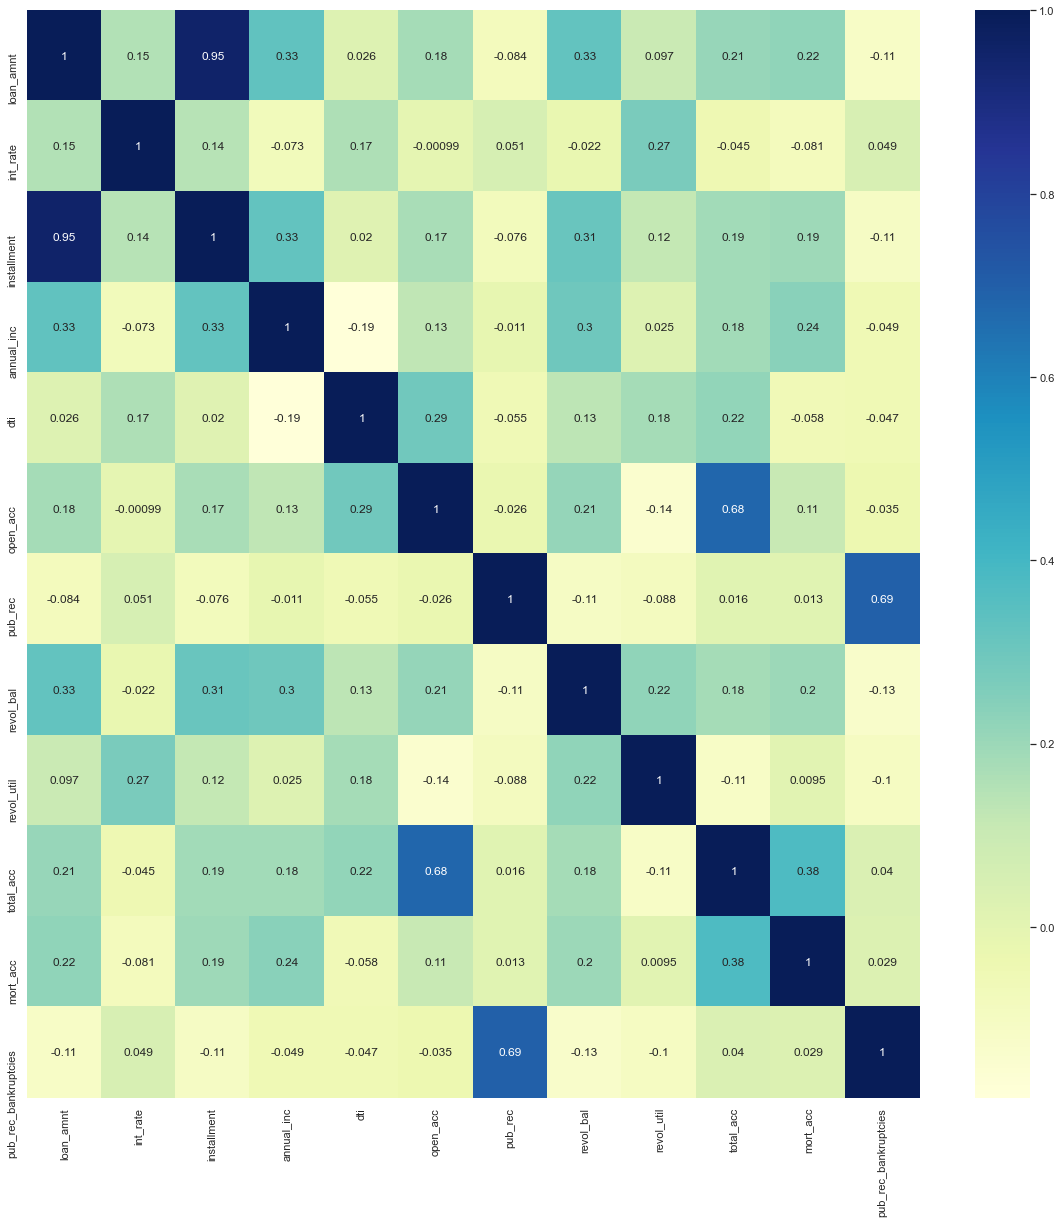

In [136]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

- loan_amnt and installment are highly correlated which means , more the number of loan amount, more are the installments.
- total_acc and open_acc are hihly corelated.
- pub_rec_bankruptcies and pub_rec are higly corelated.

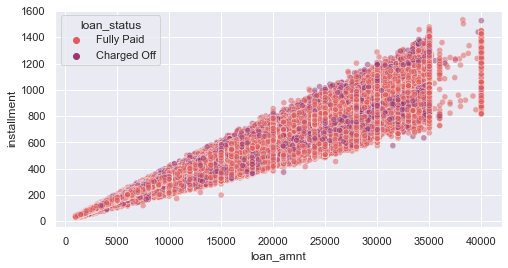

In [137]:
plt.figure(figsize = (8,4))
sns.scatterplot(data = loan_data, x = 'loan_amnt', y = 'installment', alpha = 0.5, hue = 'loan_status', palette = 'flare')
plt.show()

In [138]:
bins = [0, 10000, 20000, 30000, 40000]
group_name = ['Very Low Loan', 'Lower Loan', 'Average Loan', 'High Loan']

loan_data['Loan_bin'] = pd.cut(loan_data['loan_amnt'], bins = bins,labels = group_name)
loan_data['Loan_bin']

0         Very Low Loan
1         Very Low Loan
2            Lower Loan
3         Very Low Loan
4          Average Loan
              ...      
396024    Very Low Loan
396025    Very Low Loan
396026     Average Loan
396027    Very Low Loan
396028     Average Loan
Name: Loan_bin, Length: 335868, dtype: category
Categories (4, object): ['Very Low Loan' < 'Lower Loan' < 'Average Loan' < 'High Loan']

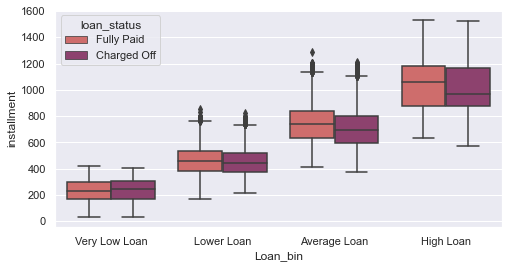

In [139]:
plt.figure(figsize = (8,4))
sns.boxplot(data = loan_data, x = 'Loan_bin', y = 'installment',  hue = 'loan_status', palette = 'flare')
plt.show()


- When the loan taken is less than 20000, then the installments in form of the monthly payment owed by the borrower if the loan originates, are similar to both types of borrowers who have defaulted and who had fully paid the loan.

- But as loan amount increases, the installments owed by the defaulters decreases as compared to the installments by the honest borrowers who are not defaulting.

In [140]:
loan_data.groupby(['loan_status'])['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,66312.0,69201.565418,59865.726070,6000.0,43657.5975,60000.0,82000.0,8706582.0
Fully Paid,269556.0,77444.626241,62372.162529,5000.0,48000.0000,66000.0,92400.0,7600000.0


In [141]:
bins = [0, 25000, 50000, 100000, 500000, 1200000, 2500000, 8706582]
group_name = ['BPL', 'Very Low', 'Low', 'Average', 'Better off', 'High', 'Very High']

loan_data['Income_bin'] = pd.cut(loan_data['annual_inc'], bins = bins,labels = group_name)
loan_data['Income_bin']

0          Average
1              Low
2         Very Low
3              Low
4              Low
            ...   
396024         Low
396025    Very Low
396026     Average
396027         Low
396028         Low
Name: Income_bin, Length: 335868, dtype: category
Categories (7, object): ['BPL' < 'Very Low' < 'Low' < 'Average' < 'Better off' < 'High' < 'Very High']

In [142]:
Income_bin = pd.crosstab(loan_data['Income_bin'], loan_data['loan_status'])
Income_bin


loan_status,Charged Off,Fully Paid
Income_bin,,
BPL,2213,6536
Very Low,22544,72973
Low,32556,138254
Average,8959,51510
Better off,36,251
High,2,22
Very High,2,10


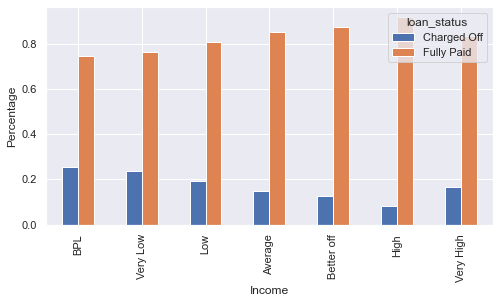

In [143]:
Income_bin.div(Income_bin.sum(axis = 1), axis = 0).plot(kind = 'bar', figsize = (8,4))
plt.xlabel('Income')
plt.ylabel('Percentage')
plt.show()

There's a high possibility of borrower defaulting (charged-off) when the income is below poverty line, very low and low category. Whereas, there are few cases where customers with high and very high income also have defaulted the loan.

In [144]:
# summary statistics for the loan amount, grouped by the loan_status.

loan_data.groupby('loan_status')['loan_amnt'].describe().round()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,66312.0,15578.0,8480.0,1000.0,9375.0,14400.0,20125.0,40000.0
Fully Paid,269556.0,14263.0,8343.0,1000.0,8000.0,12000.0,20000.0,40000.0


If the loan amount is higher we have a slight increase in the likelihood of being charged off. This makes sense, it is often harder to repay larger loans than smaller loans

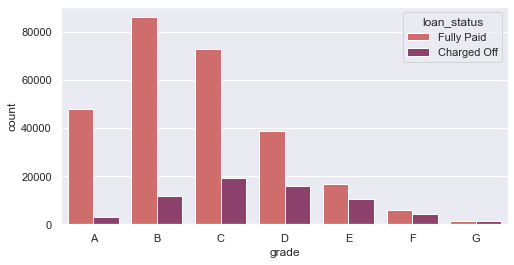

In [145]:
# Create a countplot per grade. Set the hue to the loan_status label.
order = sorted(loan_data['grade'].unique())
plt.figure(figsize = (8,4))
sns.countplot(x='grade',data=loan_data,hue='loan_status', order = order, palette='flare')
plt.show()

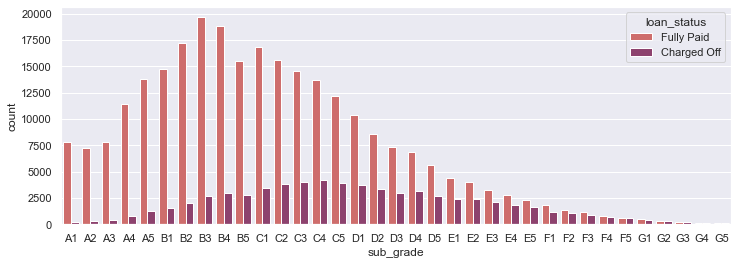

In [146]:
#Display a count plot per subgrade
plt.figure(figsize=(12,4))
order = sorted(loan_data['sub_grade'].unique())
sns.countplot(x='sub_grade',data=loan_data,hue='loan_status',order = order,palette='flare')
plt.show()

We already know grade is part of sub_grade, so just dropping the grade feature.

In [147]:
# Correlation of the numeric features to the loan_status column

# plt.figure(figsize = (8,4))
# loan_data.corr()['loan_status'].sort_values().drop('loan_status').plot(kind='bar')
# plt.show()

In [148]:
loan_data = loan_data.drop('grade', axis = 1)

## Outlier Detection


In [149]:
# Helper method to detect outliers
def remove_outlier_IQR(df):

    print("With outlier")
    print("="*15)
    print("Mean :",round(np.mean(df),2))

    print("Median:",round(np.median(df),2))

    Q1=df.quantile(0.25)
    print(f"25% of data around: {Q1}")

    Q3=df.quantile(0.75)
    print(f"75% of data around: {Q3}")

    IQR=Q3-Q1
    upper = Q3+(1.5*IQR)
    lower = Q1-(1.5*IQR)

    print(f"lower bound: {lower}, Upper bound: {upper}")

    if (np.any(df<lower)):
      print(f"No. of Outliers at the left side: {len(df[df<lower].tolist())}")
    
    if (np.any(df>upper)):
      print(f"Outliers at the right side: {len(df[df>upper].tolist())}")

    df_final=df[((df>lower) & (df<upper))]

    print(f"Data removed: {len(df)-len(df_final)}, and total {np.round(((len(df)-len(df_final))/len(df))*100, 2)}% data removed")
    print("Without outlier")
    print("="*15)
    print("Mean :",round(np.mean(df_final),2))

    print("Median:",round(np.median(df_final),2))

    return lower, upper

In [150]:
for col in num_cols[:3]:
    print(f"Checking outlier for {col}")
    print("*"*25)
    remove_outlier_IQR(data[col])
    print("\n")

Checking outlier for loan_amnt
*************************
With outlier
Mean : 14522.75
Median: 12400.0
25% of data around: 8000.0
75% of data around: 20000.0
lower bound: -10000.0, Upper bound: 38000.0
Outliers at the right side: 179
Data removed: 182, and total 0.05% data removed
Without outlier
Mean : 14508.99
Median: 12375.0


Checking outlier for int_rate
*************************
With outlier
Mean : 13.8
Median: 13.35
25% of data around: 10.64
75% of data around: 16.78
lower bound: 1.4299999999999997, Upper bound: 25.990000000000002
Outliers at the right side: 1195
Data removed: 1195, and total 0.36% data removed
Without outlier
Mean : 13.75
Median: 13.35


Checking outlier for installment
*************************
With outlier
Mean : 445.16
Median: 388.2
25% of data around: 263.78
75% of data around: 583.79
lower bound: -216.235, Upper bound: 1063.8049999999998
Outliers at the right side: 9353
Data removed: 9353, and total 2.78% data removed
Without outlier
Mean : 424.0
Median: 38

We have checked few numerical columns for outlier and we can see outliers on right side of the distribution. We will leave this as of now.

## Feature Engineering

In [151]:
loan_data['pub_rec'] = [1 if i> 1 else 0 for i in data['pub_rec']]
loan_data['mort_acc'] = [1 if i> 1 else 0 for i in data['mort_acc']]
loan_data['pub_rec_bankruptcies'] = [1 if i> 1 else 0 for i in data['pub_rec_bankruptcies']]

In [152]:
cat_cols = loan_data.select_dtypes('object').columns

In [153]:
col_for_dummyVar = []
# col_for_targetEncod = []
col_for_labelEncod = []
other_cat_cols = []
for col in cat_cols:
    if loan_data[col].nunique() <=4 and col != 'loan_status':
        col_for_dummyVar.append(col)
    elif loan_data[col].nunique() > 11 and col != 'loan_status':
#         col_for_targetEncod.append(col)
        col_for_labelEncod.append(col)
    else:
        other_cat_cols.append(col)
        

In [154]:
print(col_for_dummyVar)
print(col_for_targetEncod)
print(other_cat_cols)

['term', 'verification_status', 'initial_list_status']
['sub_grade', 'emp_title', 'issue_d', 'purpose', 'title', 'earliest_cr_line', 'address']
['emp_length', 'home_ownership', 'loan_status']


### Dummy variable creation

In [155]:
dummies = pd.get_dummies(loan_data[col_for_dummyVar],drop_first=True)
loan_data = loan_data.drop(col_for_dummyVar,axis=1)
loan_data = pd.concat([loan_data,dummies],axis=1)

### Manual Encoding

In [156]:
loan_data['emp_length'] = loan_data['emp_length'].map({'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, 
                                             '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
                                            '8 years': 8, '9 years': 9, '10+ years': 10})
loan_data['home_ownership'] = loan_data['home_ownership'].map({'RENT':1, 'MORTGAGE':2, 'OWN':3, 'OTHER':4, 
                                                     'ANY':5, 'NONE':6})
loan_data['loan_status'] = loan_data['loan_status'].map({'Fully Paid':0, 'Charged Off':1})

In [157]:
loan_data['address'][0]

'0174 Michelle Gateway\r\nMendozaberg, OK 22690'

In [158]:
# Let's feature engineer a zip code column from the address in the data set

loan_data['zip_code'] = loan_data['address'].apply(lambda address:address[-5:])


### Label Encoding

In [159]:
loan_data.select_dtypes(include='object').columns

Index(['sub_grade', 'emp_title', 'issue_d', 'purpose', 'title',
       'earliest_cr_line', 'address', 'zip_code'],
      dtype='object')

In [160]:
# stats_sub_grade = loan_data['loan_status'].groupby(loan_data['sub_grade']).agg(['count', 'mean'])
# stats_emp_title = loan_data['loan_status'].groupby(loan_data['emp_title']).agg(['count', 'mean'])
# stats_issue_d = loan_data['loan_status'].groupby(loan_data['issue_d']).agg(['count', 'mean'])
# stats_purpose = loan_data['loan_status'].groupby(loan_data['purpose']).agg(['count', 'mean'])
# stats_title = loan_data['loan_status'].groupby(loan_data['title']).agg(['count', 'mean'])
# stats_earliest_cr_line = loan_data['loan_status'].groupby(loan_data['earliest_cr_line']).agg(['count', 'mean'])
# stats_address = loan_data['loan_status'].groupby(loan_data['zip_code']).agg(['count', 'mean'])

In [161]:
# for cat in loan_data['sub_grade'].unique():
# #     data[data['sub_grade']==cat]['sub_grade'] = stats_sub_grade[stats_sub_grade.index==cat]['mean'][0]
#     prob_of_cat = stats_sub_grade[stats_sub_grade.index==cat]['mean'][0]
#     loan_data['sub_grade_te']= loan_data['sub_grade'].replace(to_replace=cat, value=prob_of_cat)

# for cat in loan_data['emp_title'].unique():
    
#     prob_of_cat = stats_emp_title[stats_emp_title.index==cat]['mean'][0]
#     loan_data['emp_title_te']= loan_data['emp_title'].replace(to_replace=cat, value=prob_of_cat)

# for cat in loan_data['issue_d'].unique():
    
#     prob_of_cat = stats_issue_d[stats_issue_d.index==cat]['mean'][0]
#     loan_data['issue_d_te'] = loan_data['issue_d'].replace(to_replace=cat, value=prob_of_cat)
    
# for cat in loan_data['purpose'].unique():
    
#     prob_of_cat = stats_issue_d[stats_issue_d.index==cat]['mean'][0]
#     loan_data['purpose_te'] = loan_data['purpose'].replace(to_replace=cat, value=prob_of_cat)

# for cat in loan_data['title'].unique():
    
#     prob_of_cat = stats_issue_d[stats_issue_d.index==cat]['mean'][0]
#     loan_data['title_te'] = loan_data['title'].replace(to_replace=cat, value=prob_of_cat)
    
# for cat in loan_data['earliest_cr_line'].unique():
    
#     prob_of_cat = stats_issue_d[stats_issue_d.index==cat]['mean'][0]
#     loan_data['earliest_cr_line_te'] = loan_data['earliest_cr_line'].replace(to_replace=cat, value=prob_of_cat)
    
# for cat in loan_data['zip_code'].unique():
    
#     prob_of_cat = stats_issue_d[stats_issue_d.index==cat]['mean'][0]
#     loan_data['zip_code_te'] = loan_data['zip_code'].replace(to_replace=cat, value=prob_of_cate)

In [162]:
cols_for_le = ['sub_grade', 'emp_title', 'issue_d', 'purpose', 'title',
       'earliest_cr_line', 'zip_code']

In [163]:
# Import sklearn labelencoder
from sklearn import preprocessing
  
# initializing sklearn labelencoder
label_encoder = preprocessing.LabelEncoder()
  
for col in cols_for_le:
    loan_data[col]= label_encoder.fit_transform(loan_data[col])

In [164]:
loan_data.select_dtypes(include='object').columns

Index(['address'], dtype='object')

In [171]:
loan_data.drop(['address', 'Loan_bin', 'Income_bin'], axis=1, inplace=True)

## Model building

In [172]:
# Assigning the featurs as X and target as y

X= loan_data.drop(["loan_status"],axis =1)
y= loan_data["loan_status"]

### Model 1

In [173]:
# Train, CV, test split
from sklearn.model_selection import train_test_split
#0.6, 0.2, 0.2 split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.2, random_state=42)

In [174]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape, y_test.shape

((214955, 25), (53739, 25), (214955,), (53739,), (67174, 25), (67174,))

In [177]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
train_scores = []
val_scores = []
scaler = StandardScaler()
# imputer = SimpleImputer(strategy='median', missing_values=np.nan)

for la in np.arange(0.01, 100.0, 5):
    scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
    scaled_lr.fit(X_train, y_train)
    train_score = scaled_lr.score(X_train, y_train)
    val_score = scaled_lr.score(X_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)

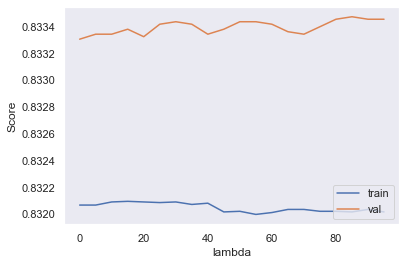

In [178]:
plt.figure()
plt.plot(list(np.arange(0.01, 100.0, 5)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 100.0, 5)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("Score")
plt.grid()
plt.show()

In [179]:
np.argmax(val_scores)

17

In [180]:
val_scores[17]

0.8334728967788757

In [181]:
l_best = 0.01+5*17
l_best

85.01

In [182]:
# Model with lambda= 85.01
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best))
scaled_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.011763321962122103))])

In [183]:
test_score = scaled_lr.score(X_test, y_test)
print(test_score)

y_pred = scaled_lr.predict(X_test)

0.8326138089141633


In [184]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

print(f"Accuracy : {accuracy_score(y_test, y_pred)*100}%")
print(f"recall_score : {recall_score(y_test, y_pred)*100}%")
print(f"precision_score : {precision_score(y_test, y_pred)*100}%")
print(f"f1_score : {f1_score(y_test, y_pred)*100}%")
print(f"AUC score : {metrics.roc_auc_score( y_test, y_pred)*100}%")
print(f"confusion_matrix :")
print(confusion_matrix(y_test, y_pred))

Accuracy : 83.26138089141632%
recall_score : 28.3951546159055%
precision_score : 68.60570805308126%
f1_score : 40.166028097062586%
AUC score : 62.59503105032047%
confusion_matrix :
[[52156  1727]
 [ 9517  3774]]


In [ ]:
### Model 2

In [185]:
# ROC function

from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

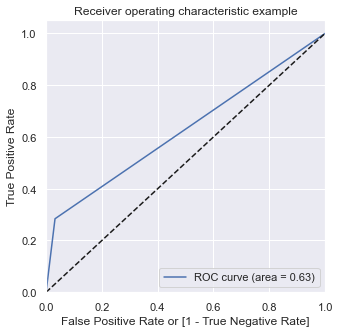

In [186]:

draw_roc(y_test, y_pred)

### Model 2

In [187]:
# Make a VIF dataframe for all the variables present
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,loan_amnt,269.11
2,installment,241.75
1,int_rate,130.43
3,sub_grade,59.05
13,open_acc,12.47
17,total_acc,12.41
20,term_ 60 months,10.25
6,home_ownership,8.86
16,revol_util,8.01
11,dti,7.35


In [189]:
X= loan_data.drop(["loan_status", 'loan_amnt', 'installment', 'int_rate'],axis =1)
y= loan_data["loan_status"]

In [191]:
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.2, random_state=42)

In [192]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape, y_test.shape

((214955, 22), (53739, 22), (214955,), (53739,), (67174, 22), (67174,))

In [193]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

In [194]:
X_train.shape, y_train.shape

((344838, 22), (344838,))

In [195]:
train_scores = []
val_scores = []
scaler = StandardScaler()
# imputer = SimpleImputer(strategy='median', missing_values=np.nan)

for la in np.arange(0.01, 100.0, 5):
    scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
    scaled_lr.fit(X_train, y_train)
    train_score = scaled_lr.score(X_train, y_train)
    val_score = scaled_lr.score(X_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)

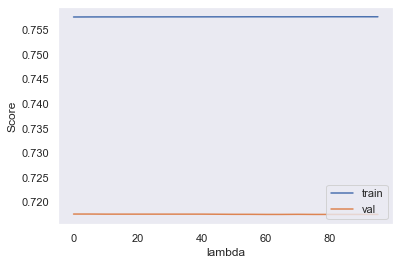

In [196]:
plt.figure()
plt.plot(list(np.arange(0.01, 100.0, 5)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 100.0, 5)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("Score")
plt.grid()
plt.show()

In [197]:
np.argmax(val_scores)

0

In [198]:
scaled_lr_2 = make_pipeline( scaler, LogisticRegression(C=1/0.01))
scaled_lr_2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=100.0))])

In [199]:
test_score = scaled_lr_2.score(X_test, y_test)
print(test_score)

y_pred = scaled_lr_2.predict(X_test)

0.7205317533569536


In [200]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

print(f"Accuracy : {accuracy_score(y_test, y_pred)*100}%")
print(f"recall_score : {recall_score(y_test, y_pred)*100}%")
print(f"precision_score : {precision_score(y_test, y_pred)*100}%")
print(f"f1_score : {f1_score(y_test, y_pred)*100}%")
print(f"AUC score : {metrics.roc_auc_score( y_test, y_pred)*100}%")
print(f"confusion_matrix :")
print(confusion_matrix(y_test, y_pred))

Accuracy : 72.05317533569536%
recall_score : 59.13023850726056%
precision_score : 37.07075471698113%
f1_score : 45.57130845727871%
AUC score : 67.18551900865506%
confusion_matrix :
[[40542 13341]
 [ 5432  7859]]


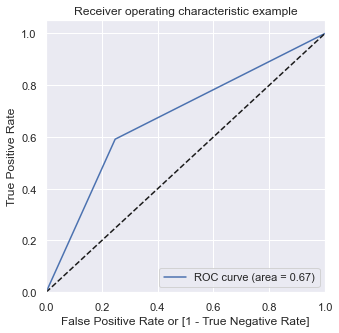

In [201]:
draw_roc(y_test, y_pred)

- We could see some improvement in F1 SCore and AUC score from model 1 to model 2. Though we can try sevaral other techniques like one hot encoding for all categorical features, and look for further improvement.

##  Recommendations

- As the NPA issues are rising for the Lending Clubs/Banks, it's necessary to think in terms of not loosing money in bad loans, Recall is the parameter which should be more focused. The term amount, purpose for the loan take ( if it's small business then there's higher possibility of defaulting ).
- As Loan Amount and Installment are highly correlated, we can do feature engineering firther to improve model performance. 

## Actionable Insights

- We see that almost 80% borrowers paid off their loans while 20% didn't.
- Around 85% of the borrowers do not have derogatory public records
- Around 88% of the borrowers do not have public record bankruptcies.
- Around 60% of the borrowers have mortgage accounts.
- The grade distribution for all the loans is : B (29%) > C (26%) > A (16%) ~ D (16%) > E (8%) > F > (3%) > G > (less than 1%)
- Around 34% of the borrowers have experience above 10 years, the rest of the categories (less than 10 years) comprise less than 10% borrowers each.
76% of the loans are of 36 months, 24% of the loans are of 60 months
- Home ownership status of borrowers : Mortgage (50%), Rent (40%), Own Property (10%)
- Verification Status of Loans : Verified (35.24%), Source Verified (33.18%), Not Verified (31.58%)
- Purpose of loans (top 2 comprise about 80%) : debt_consolidation (59%), credit_card (21%)
- Initial List Status of loans : f(60%), w(40%)
- Almost 99% of the loans have application status as 'Individual.
- The top 3 titles under which most loans were taken : Debt Consolidation, Credit Card Refinancing, Home Improvement.
- The top 3 job titles of borrowers : Managers, Teachers, Registered Nurses.

## Questionnaire Answers:
#### What percentage of customers have fully paid their Loan Amount?
- 80 % of the customers have fully paid their Loan Amount

#### Comment about the correlation between Loan Amount and Installment features.
- loan_amnt and installment are highly correlated which means , more the number of loan amount, more are the installments.
- When the loan taken is less than 20000, then the installments in form of the monthly payment owed by the borrower if the loan originates, are similar to both types of borrowers who have defaulted and who had fully paid the loan.
-  But as loan amount increases, the installments owed by the defaulters decreases as compared to the installments by the honest borrowers who are not defaulting.

#### The majority of people have home ownership as ___.
- The majority of people have home ownership as MORTGAGE 

#### People with grades ‘A’ are more likely to fully pay their loan. (T/F)
- True
#### Name the top 2 afforded job titles.
- 2 afforded job titles - Teacher and Manager

#### Thinking from a Lending Clubs/Banks's perspective, which metric should our primary focus be on(ROC AUC, Precision, Recall, F1 Score)
- If thinking purely in terms of not loosing money in bad loans, Recall is the parameter which should be more focused. THough I'm getting less recall value, can try sevaral other techniques.

#### How does the gap in precision and recall affect the Lending Clubs/Banks?
- The gap in precision and recall affects the Lending Clubs/Banks in terms if more difference in precision and recall, more are the chances of Lending Clubs/Banks loosing money in form of bad loans.

#### Which were the features that heavily affected the outcome?
- According to my analysis, Term (36 or 60 months) , Subgrades ( A, B ,F5 and G)  application_type_JOINT,Number of mortage accounts ( Mort_acc)

#### Will the results be affected by geographical location? (Yes/No)
- yes